In [1]:
import numpy as np
import pandas as pd
import anndata
import seaborn as sns
import random
import matplotlib.pyplot as plt
import utils
from fourier_solution import FourierSolve

### Anndata object 
Must contain layers: 'Ms' and 'Mu'and obs: 'cell_cycle_theta'

In [2]:
adata_file = '../data/scrna_deepcycle.h5ad'
adata = anndata.read_h5ad(adata_file)

### Unspliced, spliced, and theta for a given gene

In [3]:
gene='Ccne2'
u, s, t = utils.load_unsp(adata, gene, shift=0.85) 

### Fourier solution

In [4]:
fourier = FourierSolve(u, s, t, Nt=5, l2=10000, l3=1000)
result = fourier.fit_rates()
params = result.x
u_fit, s_fit, a, g, da_dt, dg_dt, beta_fit = fourier.gene_model(params)

### Plot solution

In [5]:
custom_params = {"axes.linewidth" : 1.5, 
                 "axes.spines.right": False, "axes.spines.top": False,
                 "xtick.direction":"in", "xtick.bottom": True, "xtick.top": False,
                 "ytick.direction":"in", "ytick.left": True, "ytick.right": False,
                }
sns.set(style="white", rc=custom_params, font_scale=1.25)
colors = sns.color_palette(palette="tab10")
alpha = 0.25
sz = 10
lw = 3

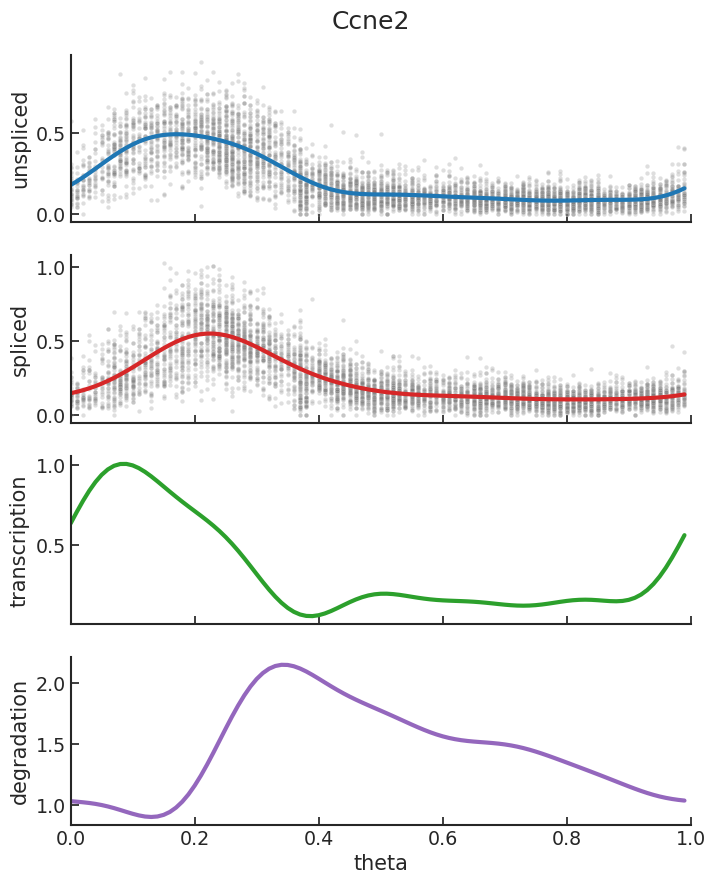

In [6]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(8, 10), sharex=True)
sns.scatterplot(x=t, y=u, color=colors[7], alpha=alpha, s=sz, linewidths=0, ax=ax1)
sns.lineplot(x=t, y=u_fit, color=colors[0], lw=lw, ax=ax1)

sns.scatterplot(x=t, y=s, color=colors[7], alpha=alpha, s=sz, linewidths=0, ax=ax2)
sns.lineplot(x=t, y=s_fit, color=colors[3], lw=lw, ax=ax2)

sns.lineplot(x=fourier.t_rs, y=a, color=colors[2], lw=lw, ax=ax3)
sns.lineplot(x=fourier.t_rs, y=g, color=colors[4], lw=lw, ax=ax4)
ax1.set_ylabel('unspliced')
ax2.set_ylabel('spliced')
ax3.set_ylabel('transcription')
ax4.set_ylabel('degradation')
ax4.set_xlabel('theta')
ax4.set_xlim([0, 1])
fig.suptitle('%s'%gene, y=0.925)
plt.show()